In [1]:
import pandas as pd
import numpy as np
from sklearn. model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

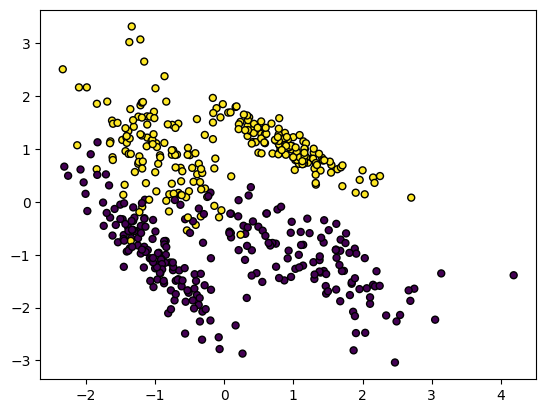

In [130]:
X1, Y1 = make_classification(n_samples=500, n_classes=2, random_state=1, 
    n_features=2, n_redundant=0)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=1)

In [132]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [9]:
class Metrics:
    def __init__(self, test, predictions):
        self.test = test
        self.predictions = predictions
        
        self.thresholds = np.unique(self.predictions)
        self.tpr = np.zeros_like(self.thresholds)
        self.fpr = np.zeros_like(self.thresholds)
        self.precisions = np.zeros_like(self.thresholds)
        self.recalls = np.zeros_like(self.thresholds)
        
    def get_tp(self, pred : np.array):
        return np.add.reduce((self.test == 1) & (pred == 1.))
    
    def get_fp(self, pred : np.array):
        return np.add.reduce((self.test == 0) & (pred == 1.))
    
    def get_tn(self, pred : np.array):
        return np.add.reduce((self.test == 0) & (pred == 0.))
    
    def get_fn(self, pred : np.array):
        return np.add.reduce((self.test == 1) & (pred == 0.))
    
    def get_tpr(self, pred : np.array):
        tp = self.get_tp(pred)
        fn = self.get_fn(pred)
        return tp / (tp + fn)
    
    def get_fpr(self, pred : np.array):
        fp = self.get_fp(pred)
        tn = self.get_tn(pred)
        return fp / (fp + tn)
    
    def get_precision(self, pred : np.array):
        tp = self.get_tp(pred)
        fp = self.get_fp(pred)
        return  tp / (tp + fp)
    
    def get_recall(self, pred : np.array):
        return self.get_tpr(pred)
    
    def precision_recall_curve(self):
        for [i, threshold] in enumerate(self.thresholds):
            pred = self.predictions >= threshold
            self.precisions[i] = self.get_precision(pred)
            self.recalls[i] = self.get_recall(pred)
        return self.precisions, self.recalls
            
    
    def roc_curve(self):
        for [i, threshold] in enumerate(self.thresholds):
            pred = self.predictions >= threshold
            self.tpr[i] = self.get_tpr(pred)
            self.fpr[i] = self.get_fpr(pred)
        return self.tpr, self.fpr
    
    

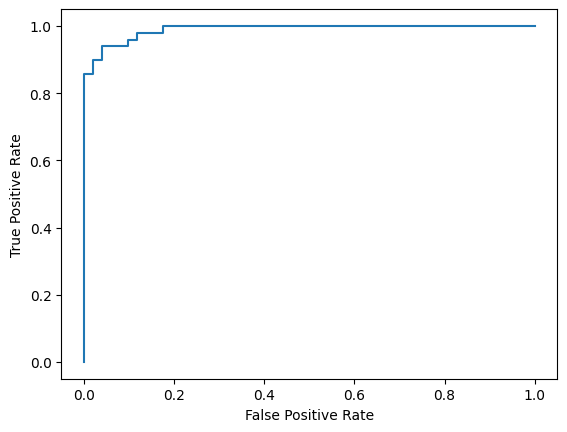

In [134]:
y_pred = logistic_regression.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [135]:
print(y_pred.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X1.shape, Y1.shape)
print(y_pred)

(100,)
(400, 2) (100, 2) (400,) (100,)
(500, 2) (500,)
[9.66672437e-01 1.13869768e-02 2.03567415e-03 9.97580850e-01
 9.95767477e-01 3.73169345e-01 1.16817271e-03 9.69926130e-01
 9.98074116e-01 2.48929730e-03 1.49357697e-02 9.81748913e-01
 1.29718337e-01 9.93820372e-01 9.98900126e-01 1.64802473e-03
 1.64109822e-02 9.96741973e-01 3.73154495e-03 9.95146235e-01
 6.53437503e-03 7.56976948e-02 8.86094868e-01 2.36135514e-02
 4.92905302e-01 9.35213568e-02 9.80382130e-01 1.47228683e-02
 7.22187426e-01 4.28490078e-03 1.74322107e-01 9.99758639e-01
 1.37427848e-02 3.29431298e-01 3.24202370e-03 9.98162618e-01
 1.22109289e-02 9.17418618e-01 4.76372207e-02 1.73467947e-01
 9.55906859e-01 9.86614637e-01 1.36469586e-03 3.46962509e-01
 2.62796739e-02 9.76723741e-01 1.55062439e-03 9.91398596e-01
 2.73671427e-02 1.05578455e-03 1.25541121e-02 9.88780294e-01
 7.59799741e-03 6.44653624e-01 5.31080125e-02 2.14667483e-03
 9.86279627e-01 9.95819912e-01 6.36256607e-01 1.64035066e-02
 3.64942137e-01 1.13838383e-03

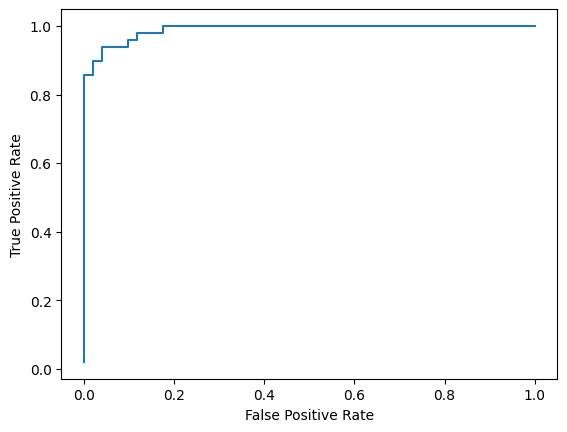

In [136]:
my_metrics1 = Metrics(y_test, y_pred)
tpr1, fpr1 = my_metrics1.roc_curve()
plt.plot (fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [137]:
print(tpr, fpr)

[0.         0.02040816 0.85714286 0.85714286 0.89795918 0.89795918
 0.93877551 0.93877551 0.95918367 0.95918367 0.97959184 0.97959184
 1.         1.        ] [0.         0.         0.         0.01960784 0.01960784 0.03921569
 0.03921569 0.09803922 0.09803922 0.11764706 0.11764706 0.17647059
 0.17647059 1.        ]


In [138]:
# tpr = tp/(tp+fn)
# fpr = fp/(fp+tn)

# b = [0.14, 0.23, 0.39, 0.52, 0.73, 0.9]
# y = []

# for threshold in range(1, 0) step 0.1:
#     b >= threshold  Yi = 1 else 0,
#     calculate tpr, fpr, precission, recall

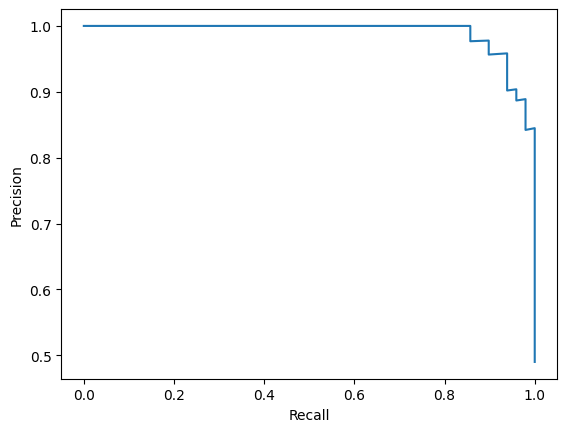

In [139]:
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred)
plt.plot (recall, precision)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show() 

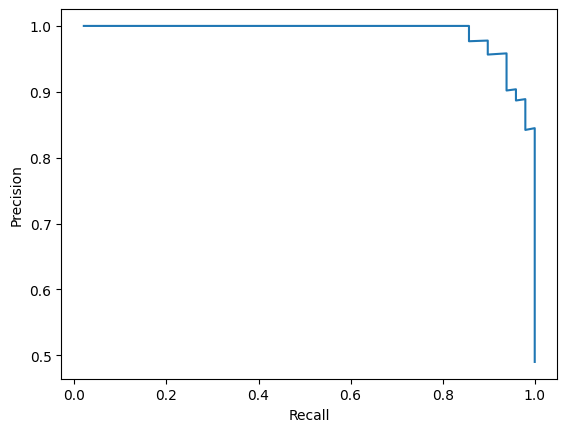

In [140]:
precision1, recall1, = my_metrics1.precision_recall_curve()
plt.plot (recall1, precision1)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show() 

In [141]:
metrics.auc(fpr1, tpr1)

0.9895958383353342

In [142]:
metrics.auc(recall1, precision1)

0.9694616044601893

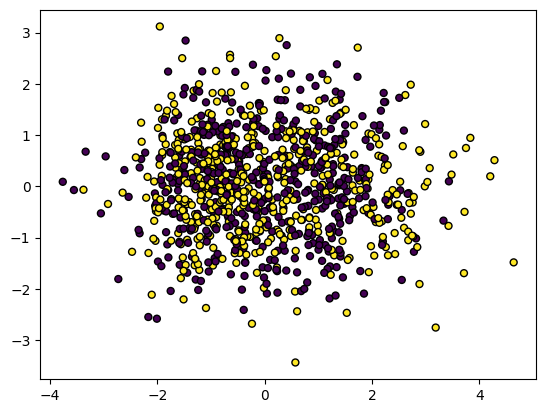

In [143]:
X1, Y1 = make_classification(n_samples=1000, n_classes=2, random_state=1)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.4, random_state=1)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

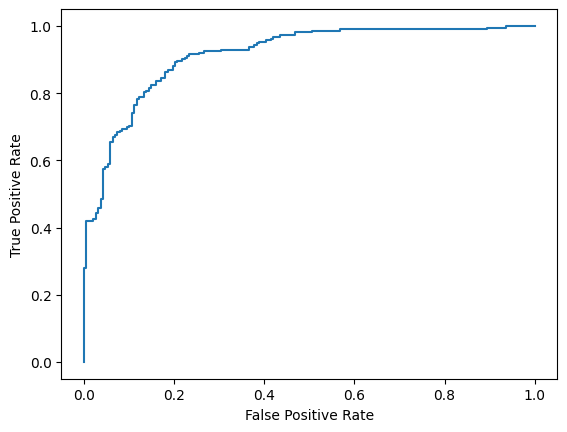

In [145]:
y_pred = logistic_regression.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 


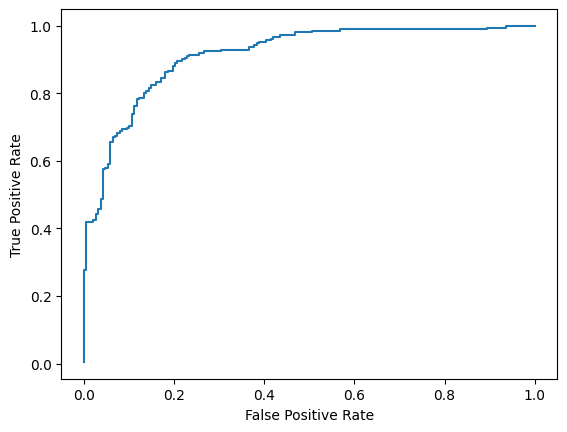

In [146]:
my_metrics2 = Metrics(y_test, y_pred)
tpr2, fpr2 = my_metrics2.roc_curve()
plt.plot (fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

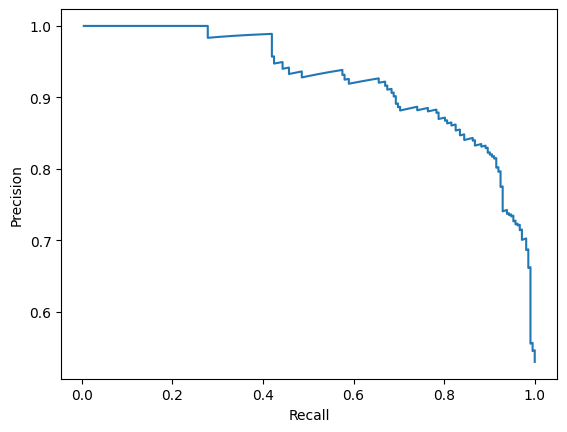

In [147]:
precision, recall = my_metrics2.precision_recall_curve()
plt.plot (recall, precision)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show() 

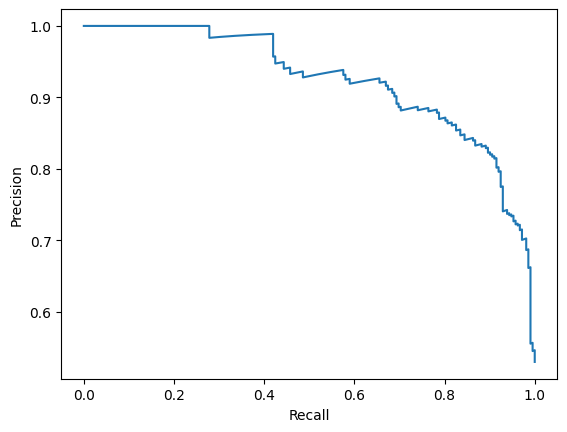

In [148]:
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred)
plt.plot (recall, precision)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show() 

In [149]:
metrics.auc(fpr, tpr)

0.9142412685668406

In [150]:
metrics.auc(recall, precision)

0.9236798288257477

In [15]:
class RandomClassifier():
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.y_train = y_train
    
    def predict_proba(self, X_test):
        predictions = np.random.uniform(low=0, high=1, size=np.shape(X_test)[0])
        return predictions
    
def make_random_classification(n_samples=1, n_classes=2):
    X1 = np.random.uniform(low=-4.0, high=4.0, size=(n_samples, 2))
    Y1 = np.random.randint(low=0, high=n_classes, size=n_samples)
    return X1, Y1

(1000, 2) (1000,)


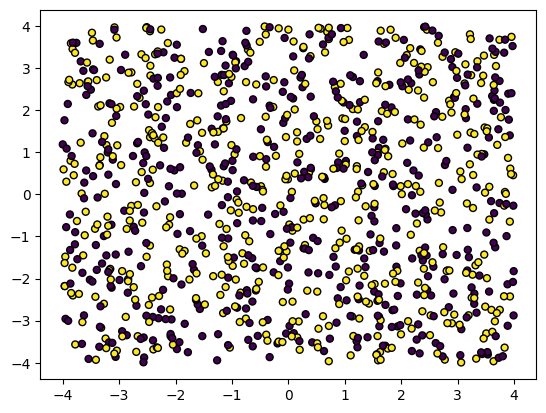

In [26]:
X1, Y1 = make_random_classification(n_samples=1000)
print(X1.shape, Y1.shape)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

In [27]:
+random_classifier = RandomClassifier()
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=1)
random_classifier.fit(X_train, y_train)
y_pred = random_classifier.predict_proba(X_test)

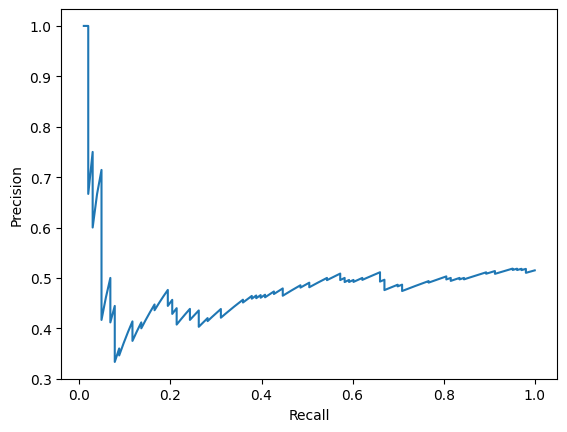

auc:  0.47674374926180646 1.0 0.009708737864077669


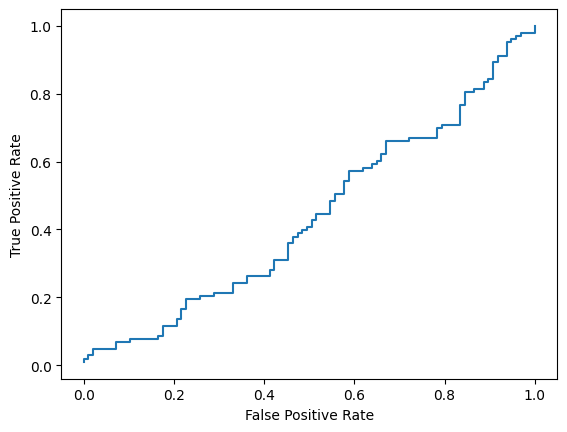

auc:  0.4383945550995897


In [28]:
my_metrics1 = Metrics(y_test, y_pred)
precision1, recall1, = my_metrics1.precision_recall_curve()
plt.plot (recall1, precision1)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
print('auc: ', metrics.auc(recall1, precision1), precision1[-1], recall1[-1])

tpr1, fpr1 = my_metrics1.roc_curve()
plt.plot (fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 
print('auc: ', metrics.auc(fpr1, tpr1))

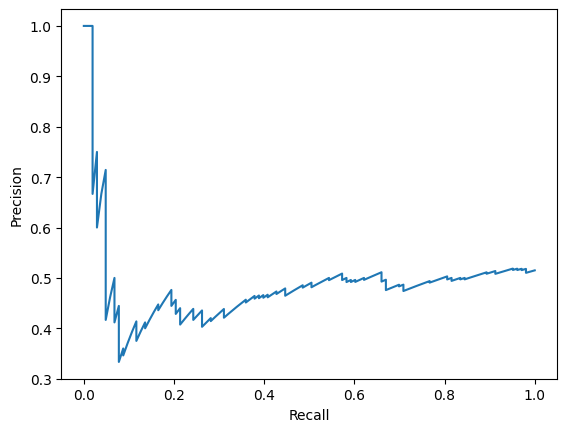

auc:  0.4864524871258841


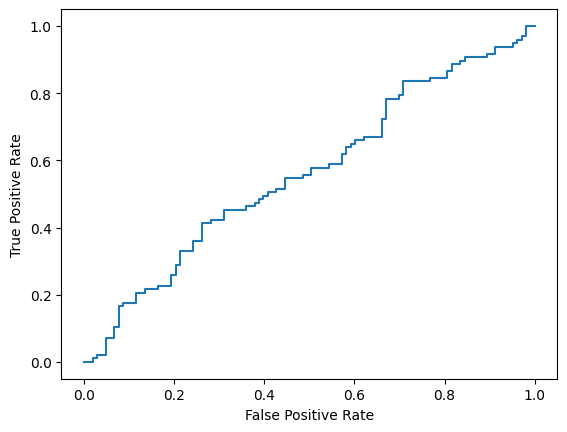

auc:  0.5616054449004103


In [29]:
precision1, recall1, _ = metrics.precision_recall_curve(y_test, y_pred)
plt.plot (recall1, precision1)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
print('auc: ', metrics.auc(recall1, precision1))

tpr1, fpr1, _ = metrics.roc_curve(y_test, y_pred)
plt.plot (fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 
print('auc: ',metrics.auc(fpr1,tpr1))